1) 
  Machine learning is great for solving complex problems that require analyzing and predicting relationships between different elements. Machine learning is the making and use of models that are "learned from data." The main goal of machine learning is to use the models generated to predict different outcomes. Machine learning has three primary types: supervised, unsupervised, and reinforcement. Supervised learning includes sets of data where the outcomes are already known while unsupervised learning includes sets of data where the outcomes are unknown. Reinforcement learning is a way to train software to make decisions based on data. Other than these primary types, there are many more including semisupervised learning and online learning.
  
  Machine learning can be used in predicting whether an email message is spam or not, there is a suspicious credit card transaction, a shopper is more likley to click on one ad over the other, or game predictions. These situations usually involve many different factors and complex situations, therefore machine learning would be useful in these cases. Machine Learning is also extremely useful for large-scale problems that have thousands if not millions of inputs.

  However, machine learning cannot be used for every problem. Simple problems that do not require data-driven learning do not need machine learning to solve the problem. There are also a few limitations to machine learning that may cause it to not be as accurate in its outcomes. One limitation to machine learning is that it requires great amounts of good data. If the quantity or the quality of the data is not good, then the accuracy of the model as well its predictions may not be ideal. Therefore, if there is not enough data, then it is not ideal to utilize machine learning. Also, in cases where there cannot be any margin or error, such as in medicine, and there is no supervisor available, it is not ideal to use machine learning. This is because machine learning systems with over 90 percent accuracy can still be incorrect and for fields like medicine, these decisions could be fatal. Therefore, having a supervisor in these cases increases the effectiveness and accuracy of these machine learning systems.

https://towardsdatascience.com/to-use-or-not-to-use-machine-learning-d28185382c14#:~:text=Machine%20Learning%20is%20great%20at,heuristics%20or%20if%2Delse%20statements.

https://docs.aws.amazon.com/machine-learning/latest/dg/when-to-use-machine-learning.html

https://www.springboard.com/blog/data-science/when-not-to-use-ml/

https://qymatix.de/en/situations-without-machine-learning/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
loans_df = pd.read_csv('loans_full_schema.csv')
loans_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


2) Converting categorical values to numerical

In [2]:
homeownership_map = {'MORTGAGE':1,'RENT':2,'OWN':3}
loans_df['homeownership'] = loans_df['homeownership'].map(homeownership_map)
loans_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,1,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,2,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,2,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,2,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,2,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,3,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,1,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,1,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,1,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,2,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


2) One Hot Encoding

In [3]:
loans_df = pd.get_dummies(loans_df['verified_income'])
loans_df.head(10)

,Not Verified,Source Verified,Verified
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
5,1,0,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


2. Nominal Values

In [3]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
loans_df['disbursement_method'] = class_labels.fit_transform(loans_df['disbursement_method'].values)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,0,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,0,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,0,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,0,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,0,21430.15,2324.65,1569.85,754.80,0.0


In [2]:
#3
import seaborn as sns
loans_df.corr()

/tmp/ipykernel_6687/3147879463.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_df.corr()


,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.096469,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,...,0.030083,0.091255,0.056243,-0.029621,0.075981,0.086768,0.024246,0.018153,0.049517,0.001851
annual_income,0.096469,1.000000,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,...,-0.030568,0.324665,0.044843,-0.099584,0.315693,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.026157,-0.180445,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,...,0.006560,0.056329,0.046490,0.141653,0.066408,0.065996,-0.003918,-0.020116,0.121160,-0.010110
annual_income_joint,0.071282,0.724664,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,...,-0.047933,0.330607,0.017057,-0.165327,0.303795,0.302291,0.108933,0.092761,0.120788,-0.002689
debt_to_income_joint,0.002103,-0.179790,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,...,-0.057415,0.045363,0.037234,0.266417,0.079405,0.055566,0.001389,-0.025166,0.177931,-0.028840
delinq_2y,0.008242,0.052236,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,...,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
months_since_last_delinq,0.028790,-0.040392,0.034637,-0.049124,0.065376,-0.566551,1.000000,0.030064,0.022727,-0.014727,...,0.096420,0.029247,0.036953,-0.082930,0.008274,0.036517,-0.017350,-0.016431,-0.009362,0.005123
earliest_credit_line,-0.234408,-0.156001,-0.089700,-0.175325,-0.091637,-0.078109,0.030064,1.000000,0.042745,-0.294621,...,-0.040181,-0.117749,-0.032736,0.103635,-0.100001,-0.107508,-0.040281,-0.036125,-0.037027,0.020522
inquiries_last_12m,0.003753,0.090119,0.025388,0.082176,0.029515,0.003152,0.022727,0.042745,1.000000,0.210433,...,0.081222,0.034653,0.030506,0.131193,0.043704,0.026550,0.032823,0.023155,0.077204,0.022404
total_credit_lines,0.133472,0.210163,0.198647,0.240166,0.187683,0.068040,-0.014727,-0.294621,0.210433,1.000000,...,-0.002579,0.179275,0.091341,-0.044435,0.157548,0.158414,0.082315,0.068932,0.112342,-0.030621


/tmp/ipykernel_4868/3869602332.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loans_df.corr()


<AxesSubplot: >

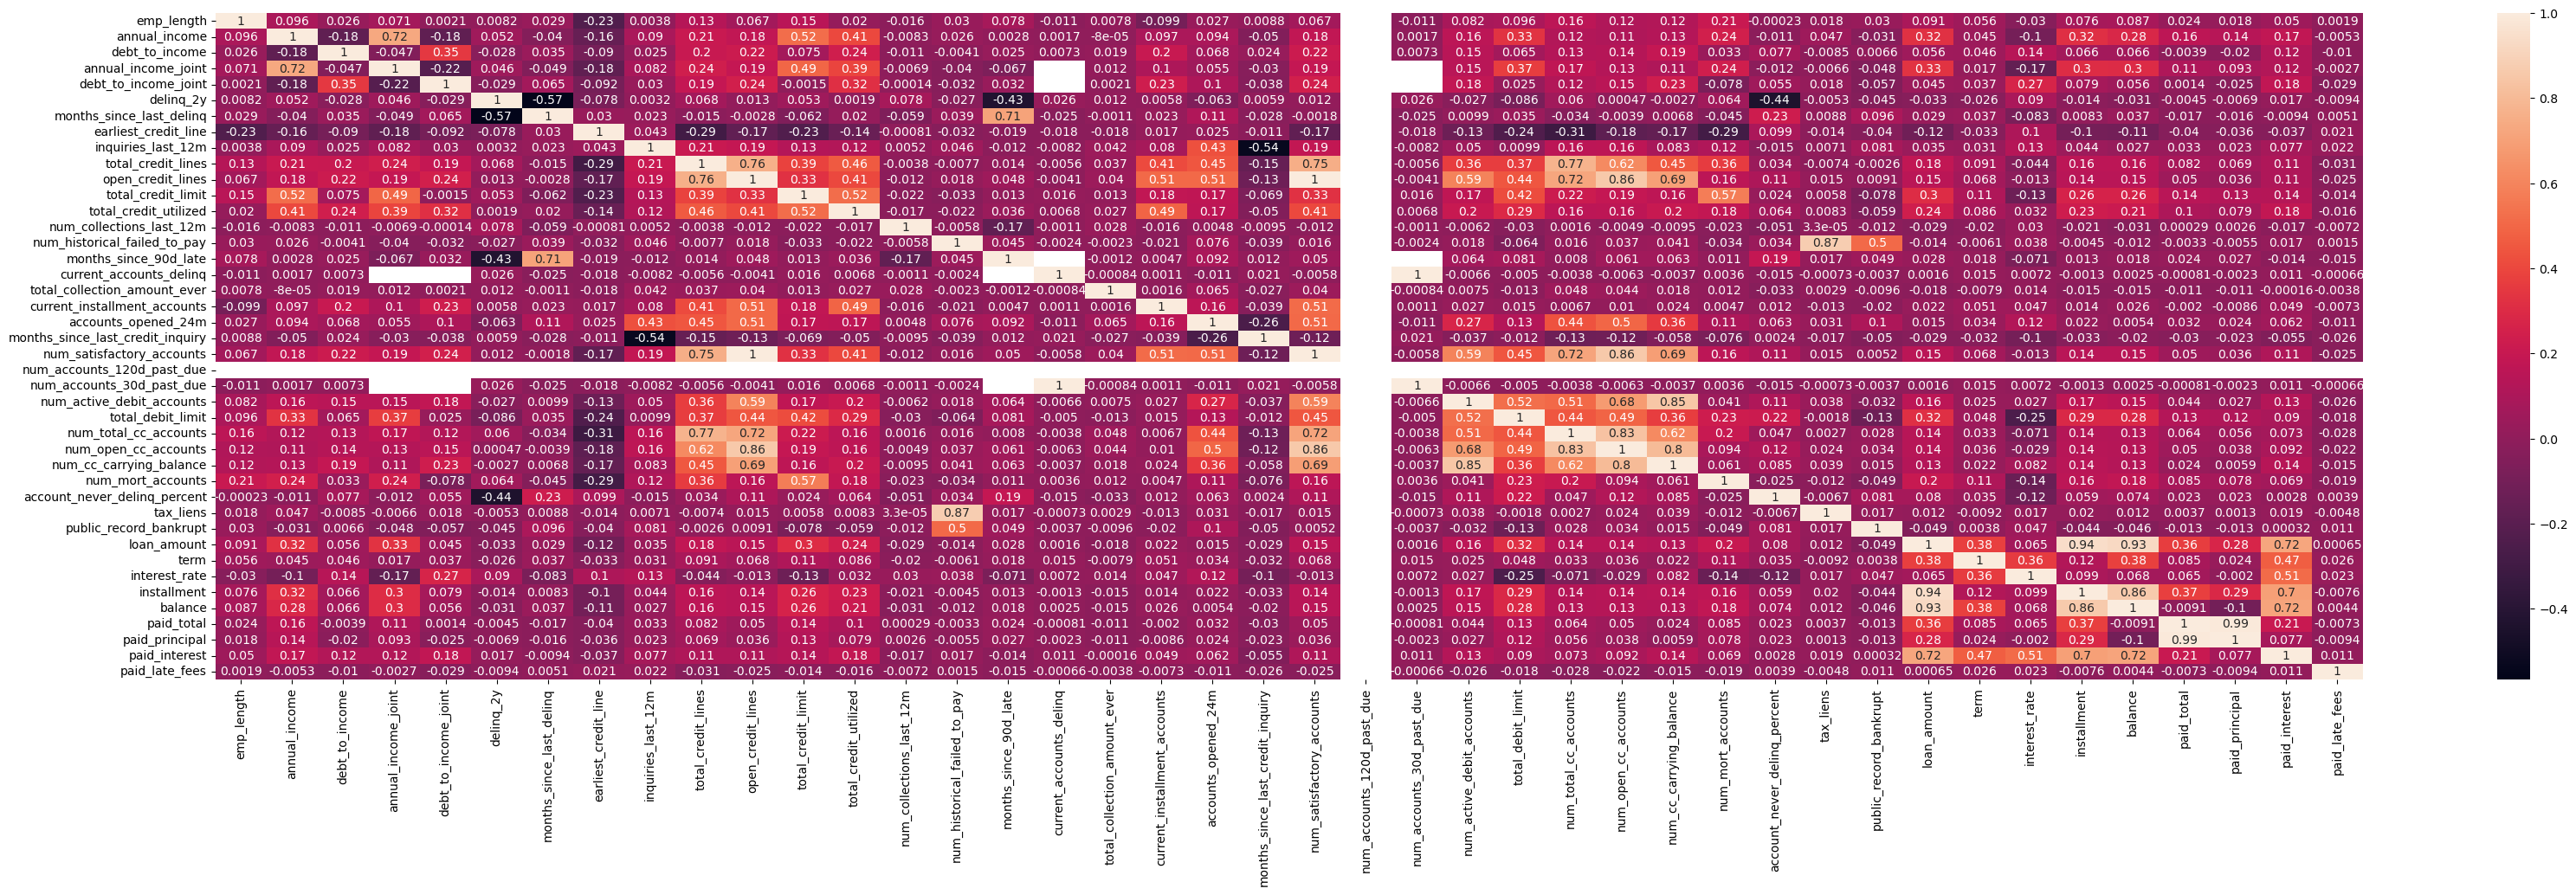

In [24]:
f, ax = plt.subplots(figsize=(40, 10))
corr = loans_df.corr()
sns.heatmap(corr, annot=True)

This heatmap shows the correlation between the different variables. They range from -1 to 1. The closer to 1 the numbers are, the more positive correlation they have. The closer they are to -1, the more negative correlation they have. Also, darker colors tend to indicate a higher correlation compared to lighter colors. This heatmap also shows white spaces which could indicate NaN values. Also, this heatmap showcases there to be a high correlation between most variables whether it be negative or positive.

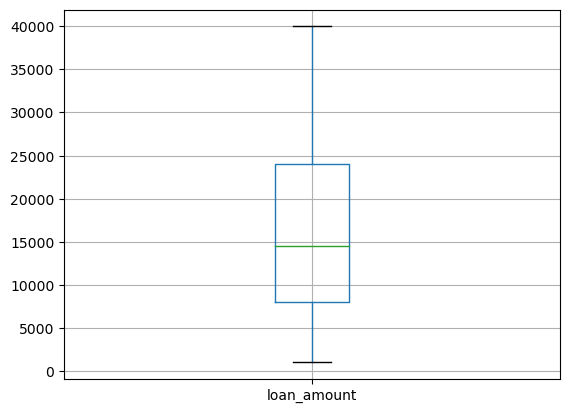

In [19]:
#4
boxplot = loans_df.boxplot(column=['loan_amount'], return_type='axes')

For the null values, you can create a filtered list and remove the null values. After that, you plot the box plot. This box and whisker plot shows the lowest loan amount, the median, the lower and upper quartile, and the highest loan amount. In this case, the highest loan amount seems to be about 40,000 dollars. As for the lowest loan amount seems to be less than 5000 dollars. The median is about 14,000 dollars.

In [8]:
#5
state = {'AK':'Pacific',
         'AL':'South',
         'AR':'South',
         'AS':'Other',
         'AZ':'South',
         'CA':'Pacific',
         'CO':'Plains',
         'CT':'Northeast',
         'DC':'South',
         'DE':'Northeast',
         'FL':'South',
         'GA':'South',
         'GU':'Other',
         'HI':'Pacific',
         'IA':'Midwest',
         'ID':'Pacific',
         'IL':'Midwest',
         'IN':'Midwest',
         'KS':'Midwest',
         'KY':'South',
         'LA':'South',
         'MA':'Northeast',
         'MD':'Northeast',
         'ME':'Northeast',
         'MI':'Midwest',
         'MN':'Midwest',
         'MO':'Midwest',
         'MP':'Other',
         'MS':'South',
         'MT':'Pacific',
         'NC':'South',
         'ND':'Midwest',
         'NE':'Midwest',
         'NH':'Northeast',
         'NJ':'Northeast',
         'NM':'South',
         'NV':'South',
         'NY':'Northeast',
         'OH':'Midwest',
         'OK':'South',
         'OR':'Pacific',
         'PA':'Northeast',
         'PR':'Other',
         'RI':'Northeast',
         'SC':'South',
         'SD':'Midwest',
         'TN':'South',
         'TX':'South',
         'UT':'Plains',
         'VA':'South',
         'VI':'Other',
         'VT':'Northeast',
         'WA':'Pacific',
         'WI':'Midwest',
         'WV':'South',
         'WY':'Pacific',}
loans_df['region'] = loans_df['state'].apply(lambda x : state.get(x))
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific


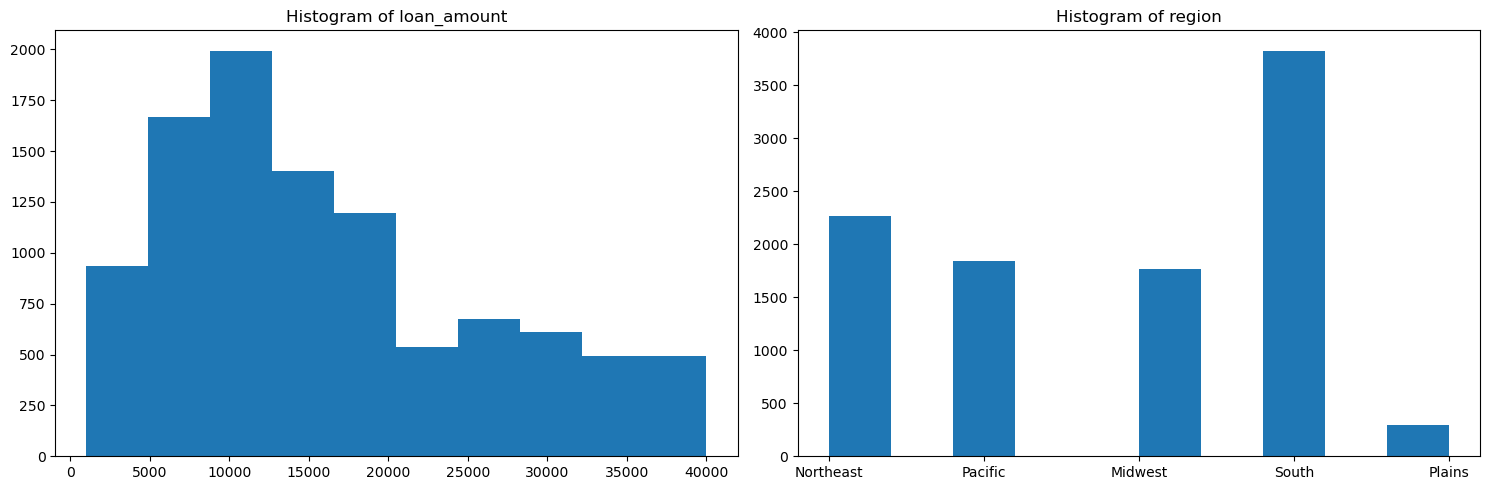

In [9]:
#6
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(loans_df['loan_amount'],bins=10)
axs[0].set_title('Histogram of loan_amount')

axs[1].hist(loans_df['region'],bins=10)
axs[1].set_title('Histogram of region')

plt.tight_layout()
plt.show()

From the histograms, it seems that the South region has the most loan amounts that they have to pay followed by the northeast, pacific, midwest, and plains. The highest loan amount is 40000 which a lot of people. 